In [1]:
!pip install keras

In [2]:
#Librerias
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import random
from shutil import rmtree
import tensorflow as tf
from keras.callbacks import TensorBoard
from keras.utils import to_categorical
#from keras_preprocessing.image import load_img, img_to_array, array_to_img, save_img
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import os
import seaborn as sns
from keras.applications.vgg19 import VGG19
from sklearn import svm
import sklearn
from sklearn.model_selection import train_test_split
#########################################################

from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import make_scorer

MCC_scorer = make_scorer(matthews_corrcoef)
#######################################################

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#NHS TIPO NIC1 SEG
#307
image_ids_array = ['I264211_C1.jpg', 'I169320_C2.jpg', 'I166612_C1.jpg', 'I169320_C1.jpg', 'I166612_C2.jpg', 'I150818_C2.jpg', 'I150818_C1.jpg', 'I149745_C2.jpg', 'I149745_C1.jpg', 'I133591_C2.jpg', 'I126100_C1.jpg', 'I133591_C1.jpg', 'I126100_C2.jpg', 'I124361_C1.jpg', 'I103738_C1.jpg', 'I103738_C2.jpg', 'I124361_C2.jpg', 'I124032_C2.jpg', 'I124032_C1.jpg', 'I264211_C2.jpg', 'I342192_C2.jpg', 'I342192_C1.jpg', 'I339977_C2.jpg', 'I335731_C2.jpg', 'I326517_C1.jpg', 'I324210_C2.jpg', 'I339977_C1.jpg', 'I335731_C1.jpg', 'I326517_C2.jpg', 'I324210_C1.jpg', 'I298042_C2.jpg', 'I295650_C1.jpg', 'I295650_C2.jpg', 'I293440_C1.jpg', 'I274386_C2.jpg', 'I293440_C2.jpg', 'I313616_C2.jpg', 'I298042_C1.jpg', 'I313616_C1.jpg', 'I274386_C1.jpg', 'I522521_C1.jpg', 'I517492_C2.jpg', 'I493937_C1.jpg', 'I493937_C2.jpg', 'I517492_C1.jpg', 'I505766_C2.jpg', 'I505766_C1.jpg', 'I474789_C1.jpg', 'I478042_C1.jpg', 'I478042_C2.jpg', 'I474789_C2.jpg', 'I466728_C2.jpg', 'I466728_C1.jpg', 'I437637_C1.jpg', 'I437637_C2.jpg', 'I371059_C2.jpg', 'I368134_C2.jpg', 'I368134_C1.jpg', 'I371059_C1.jpg', 'I352381_C2.jpg', 'I352381_C1.jpg', 'I635482_C1.jpg', 'I633710_C1.jpg', 'I633710_C2.jpg', 'I630618_C1.jpg', 'I630618_C2.jpg', 'I608976_C2.jpg', 'I608935_C1.jpg', 'I608976_C1.jpg', 'I608935_C2.jpg', 'I595301_C2.jpg', 'I592231_C2.jpg', 'I592231_C1.jpg', 'I595301_C1.jpg', 'I584458_C1.jpg', 'I584458_C2.jpg', 'I580816_C1.jpg', 'I580149_C1.jpg', 'I580816_C2.jpg', 'I580149_C2.jpg', 'I545787_C2.jpg', 'I579989_C1.jpg', 'I535966_C2.jpg', 'I545787_C1.jpg', 'I579989_C2.jpg', 'I535966_C1.jpg', 'I527027_C1.jpg', 'I527027_C2.jpg', 'I522521_C2.jpg', 'I743469_C1.jpg', 'I743435_C2.jpg', 'I704275_C2.jpg', 'I743333_C1.jpg', 'I677963_C1.jpg', 'I702418_C1.jpg', 'I691209_C2.jpg', 'I743333_C2.jpg', 'I702418_C2.jpg', 'I704275_C1.jpg', 'I691209_C1.jpg', 'I677963_C2.jpg', 'I662039_C1.jpg', 'I643611_C1.jpg', 'I672531_C1.jpg', 'I662039_C2.jpg', 'I672531_C2.jpg', 'I668441_C2.jpg', 'I668441_C1.jpg', 'I643611_C2.jpg', 'I635482_C2.jpg', 'I743893_C1.jpg', 'I743892_C2.jpg', 'I743892_C1.jpg', 'I743874_C1.jpg', 'I743834_C2.jpg', 'I743874_C2.jpg', 'I743834_C1.jpg', 'I743827_C2.jpg', 'I743714_C2.jpg', 'I743827_C1.jpg', 'I743704_C2.jpg', 'I743635_C2.jpg', 'I743624_C1.jpg', 'I743624_C2.jpg', 'I743635_C1.jpg', 'I743507_C1.jpg', 'I743507_C2.jpg', 'I743622_C2.jpg', 'I743550_C1.jpg', 'I743622_C1.jpg', 'I743476_C2.jpg', 'I744362_C1.jpg', 'I744351_C1.jpg', 'I744351_C2.jpg', 'I744335_C2.jpg', 'I744345_C2.jpg', 'I744345_C1.jpg', 'I744294_C2.jpg', 'I744335_C1.jpg', 'I744294_C1.jpg', 'I744206_C2.jpg', 'I744175_C1.jpg', 'I744206_C1.jpg', 'I744114_C2.jpg', 'I744131_C1.jpg', 'I744175_C2.jpg', 'I744129_C1.jpg', 'I744131_C2.jpg', 'I744129_C2.jpg', 'I744114_C1.jpg', 'I744029_C2.jpg', 'I743893_C2.jpg', 'I743951_C2.jpg', 'I743951_C1.jpg', 'I744029_C1.jpg', 'I744074_C2.jpg', 'I744074_C1.jpg', 'I744068_C2.jpg', 'I744068_C1.jpg', 'I744722_C1.jpg', 'I744694_C2.jpg', 'I744691_C2.jpg', 'I744694_C1.jpg', 'I744691_C1.jpg', 'I744599_C2.jpg', 'I744606_C2.jpg', 'I744606_C1.jpg', 'I744624_C2.jpg', 'I744624_C1.jpg', 'I744599_C1.jpg', 'I744548_C2.jpg', 'I744457_C2.jpg', 'I744443_C2.jpg', 'I744472_C2.jpg', 'I744457_C1.jpg', 'I744548_C1.jpg', 'I744406_C2.jpg', 'I744472_C1.jpg', 'I744406_C1.jpg', 'I744443_C1.jpg', 'I744362_C2.jpg', 'I745157_C1.jpg', 'I745139_C2.jpg', 'I745136_C2.jpg', 'I745139_C1.jpg', 'I745136_C1.jpg', 'I745096_C2.jpg', 'I745085_C2.jpg', 'I745092_C2.jpg', 'I745096_C1.jpg', 'I745092_C1.jpg', 'I745024_C2.jpg', 'I745047_C2.jpg', 'I745047_C1.jpg', 'I745085_C1.jpg', 'I745024_C1.jpg', 'I744912_C2.jpg', 'I744912_C1.jpg', 'I744778_C2.jpg', 'I744751_C2.jpg', 'I744751_C1.jpg', 'I744722_C2.jpg', 'I744732_C2.jpg', 'I744778_C1.jpg', 'I744732_C1.jpg', 'I745824_C2.jpg', 'I745838_C2.jpg', 'I745838_C1.jpg', 'I745847_C1.jpg', 'I745796_C1.jpg', 'I745824_C1.jpg', 'I745791_C2.jpg', 'I745796_C2.jpg', 'I745756_C1.jpg', 'I745743_C1.jpg', 'I745709_C1.jpg', 'I745308_C1.jpg', 'I745543_C1.jpg', 'I745308_C2.jpg', 'I745562_C1.jpg', 'I745484_C2.jpg', 'I745290_C1.jpg', 'I745266_C1.jpg', 'I745290_C2.jpg', 'I745266_C2.jpg', 'I745232_C2.jpg', 'I745157_C2.jpg', 'I745165_C2.jpg', 'I745165_C1.jpg', 'I745232_C1.jpg', 'I746524_C1.jpg', 'I746431_C1.jpg', 'I746360_C2.jpg', 'I746360_C1.jpg', 'I746308_C2.jpg', 'I746308_C1.jpg', 'I746274_C2.jpg', 'I746259_C1.jpg', 'I746123_C1.jpg', 'I746123_C2.jpg', 'I746174_C2.jpg', 'I746072_C1.jpg', 'I746035_C2.jpg', 'I746035_C1.jpg', 'I746072_C2.jpg', 'I745983_C2.jpg', 'I745930_C2.jpg', 'I745957_C1.jpg', 'I745930_C1.jpg', 'I745847_C2.jpg', 'I745886_C2.jpg', 'I745957_C2.jpg', 'I745983_C1.jpg', 'I745964_C2.jpg', 'I745964_C1.jpg', 'I745886_C1.jpg', 'I750994_C1.jpg', 'I747684_C1.jpg', 'I751566_C1.jpg', 'I751566_C2.jpg', 'I753457_C1.jpg', 'I750994_C2.jpg', 'I753457_C2.jpg', 'I747104_C2.jpg', 'I747104_C1.jpg', 'I747028_C2.jpg', 'I746771_C2.jpg', 'I746614_C2.jpg', 'I746614_C1.jpg', 'I746692_C2.jpg', 'I746596_C1.jpg', 'I746556_C1.jpg', 'I746566_C2.jpg', 'I746692_C1.jpg', 'I746556_C2.jpg', 'I746539_C1.jpg', 'I746566_C1.jpg', 'I746524_C2.jpg', 'I746539_C2.jpg', 'I746431_C2.jpg', 'I860432_C2.jpg', 'I860432_C1.jpg', 'I858460_C2.jpg', 'I858460_C1.jpg', 'I836429_C2.jpg', 'I845923_C1.jpg', 'I850562_C1.jpg', 'I849456_C2.jpg', 'I850562_C2.jpg', 'I849456_C1.jpg', 'I845923_C2.jpg', 'I836429_C1.jpg', 'I802100_C1.jpg', 'I782433_C1.jpg', 'I810715_C1.jpg', 'I765390_C2.jpg', 'I765390_C1.jpg', 'I763975_C1.jpg', 'I802100_C2.jpg', 'I810715_C2.jpg', 'I763975_C2.jpg', 'I875628_C1.jpg', 'I862260_C1.jpg', 'I875628_C2.jpg', 'I874390_C2.jpg', 'I874390_C1.jpg', 'I862260_C2.jpg']
print(len(image_ids_array))

307


In [6]:
#Cargar Dataset CITOBOT
url="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/PruebasCITOBOT_Anon.csv"
data1 = pd.read_csv(url, header=0)

data1.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
data1['DIAGN'] = data1['DIAGN'].replace({2: 1})
data1['DIAGN'] = data1['DIAGN'].replace({3: 1})
data1['DIAGN'] = data1['DIAGN'].replace({4: 1})
data1 = data1[data1['DIAGN'] != 5]
print(data1['DIAGN'].value_counts())
data1

0    303
1    168
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,Case 001,2,20230411101755.jpg,PruebasCITOBOT_Anon/Case 001/,0
1,Case 001,2,20230411101702.jpg,PruebasCITOBOT_Anon/Case 001/,0
2,Case 002,2,20230411100907.jpg,PruebasCITOBOT_Anon/Case 002/,0
3,Case 002,2,20230411100934.jpg,PruebasCITOBOT_Anon/Case 002/,0
4,Case 003,2,20230411100207.jpg,PruebasCITOBOT_Anon/Case 003/,0
...,...,...,...,...,...
567,Case 248,2,20230418104244.jpg,PruebasCITOBOT_Anon/Case 248/,0
568,Case 249,2,20230418103711.jpg,PruebasCITOBOT_Anon/Case 249/,1
569,Case 249,2,20230418103638.jpg,PruebasCITOBOT_Anon/Case 249/,1
570,Case 250,2,20230418093117.jpg,PruebasCITOBOT_Anon/Case 250/,0


In [7]:
#Cargar Dataset WHO
url2="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/Dataset_WHOSeg.csv"
data2 = pd.read_csv(url2, header=0)

data2.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
data2 = data2.drop(data2[data2.IMAGE_ID == "AAJK5.jpg"].index)
data2['DIAGN'] = data2['DIAGN'].replace({2: 1})
data2['DIAGN'] = data2['DIAGN'].replace({3: 1})
print(data2['DIAGN'].value_counts())
data2

1    597
0    124
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,14.0,AAHE,AAHE.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
1,14.0,AAHE,AAHE0.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
2,14.0,AAHE,AAHE1.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
3,14.0,AAHE,AAHE3.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
4,14.0,AAHE,AAHE4.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
...,...,...,...,...,...
717,184.0,AEU,AEU1.jpg,WHO_SEG/IARCImageBankVIA/Case 184/,1
718,185.0,ADF,ADF0.jpg,WHO_SEG/IARCImageBankVIA/Case 185/,1
719,185.0,ADF,ADF1.jpg,WHO_SEG/IARCImageBankVIA/Case 185/,1
720,186.0,ABK,ABK0.jpg,WHO_SEG/IARCImageBankVIA/Case 186/,1


In [8]:
#Cargar Dataset NCI
url3="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/trainingDatasetSEG.csv"
data3 = pd.read_csv(url3, header=0)

data3.columns = ['PATIENT_IDR', 'IMAGE_ID', 'AGE_GRP', 'WRST_HIST_AFTER', 'WRST_HIST_AFTER_DT', 'HPV_STATUS', 'HPV_DT', 'TIMEPNT', 'PATH']

#Imagenes que no estan segmentadas =================================
data3 = data3.drop(data3[data3.IMAGE_ID == "I770636_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I862299_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I344141_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I741415_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I584615_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I325700_C1.jpg"].index)
#===================================================================

data3 = data3[((data3['PATH'] == 'training_SEG/Biopsy_Study/') & (data3['WRST_HIST_AFTER'].isin([0, 1]))) | ((data3['PATH'] == 'training_SEG/NHS/') & (data3['WRST_HIST_AFTER'] == 0))]
data3 = data3.rename(columns={'WRST_HIST_AFTER': 'DIAGN'})
data3 = data3.rename(columns={'PATIENT_IDR': 'CASE_NUMBER'})
data3 = data3.rename(columns={'AGE_GRP': 'CASE_ID'})
data3 = data3.drop('WRST_HIST_AFTER_DT', axis=1)
data3 = data3.drop('HPV_STATUS', axis=1)
data3 = data3.drop('HPV_DT', axis=1)
data3 = data3.drop('TIMEPNT', axis=1)
data3 = data3.reindex(columns=['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN'])
dataC1 = data3[data3['DIAGN'] == 0]
dataC2 = data3[data3['DIAGN'] == 1]
data_aleatoria = dataC1.sample(n=531)
data_aleatoria2 = dataC2.sample(n=58)
data3 = pd.concat([data_aleatoria, data_aleatoria2])
print(data3['DIAGN'].value_counts())
data3

0    531
1     58
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
66171,P713094,7,I188379_C1.jpg,training_SEG/NHS/,0
226,P505171,2,I310403.jpg,training_SEG/Biopsy_Study/,0
72843,P830273,3,I586710_C2.jpg,training_SEG/NHS/,0
36297,P164667,8,I800439_C2.jpg,training_SEG/NHS/,0
45377,P328467,3,I286420_C1.jpg,training_SEG/NHS/,0
...,...,...,...,...,...
256,P553139,2,I376163.jpg,training_SEG/Biopsy_Study/,1
62,P215862,2,I496575.jpg,training_SEG/Biopsy_Study/,1
459,P894480,2,I247399.jpg,training_SEG/Biopsy_Study/,1
432,P844367,2,I470493.jpg,training_SEG/Biopsy_Study/,1


In [9]:
#Cargar Dataset Kaggle
url4="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/kaggleDataset_SEG.csv"
data4 = pd.read_csv(url4, header=0)

data4.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
data4['DIAGN'] = data4['DIAGN'].replace({2: 1})
dataC1 = data4[data4['DIAGN'] == 0]
dataC2 = data4[data4['DIAGN'] == 1]
data_aleatoria = dataC1.sample(n=244)
data_aleatoria2 = dataC2.sample(n=244)
data4 = pd.concat([data_aleatoria, data_aleatoria2])
print(data4['DIAGN'].value_counts())
data4

0    244
1    244
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
125,0,0,379.jpg,Kaggle_SEG/Type_1/,0
215,0,0,817.jpg,Kaggle_SEG/Type_1/,0
121,0,0,35.jpg,Kaggle_SEG/Type_1/,0
24,0,0,1105.jpg,Kaggle_SEG/Type_1/,0
174,0,0,623.jpg,Kaggle_SEG/Type_1/,0
...,...,...,...,...,...
917,0,0,816.jpg,Kaggle_SEG/Type_2/,1
796,0,0,597.jpg,Kaggle_SEG/Type_2/,1
482,0,0,1381.jpg,Kaggle_SEG/Type_2/,1
1235,0,0,300.jpg,Kaggle_SEG/Type_3/,1


In [10]:
data = pd.concat([data2, data3])
data

,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,14.0,AAHE,AAHE.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
1,14.0,AAHE,AAHE0.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
2,14.0,AAHE,AAHE1.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
3,14.0,AAHE,AAHE3.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
4,14.0,AAHE,AAHE4.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
...,...,...,...,...,...
256,P553139,2,I376163.jpg,training_SEG/Biopsy_Study/,1
62,P215862,2,I496575.jpg,training_SEG/Biopsy_Study/,1
459,P894480,2,I247399.jpg,training_SEG/Biopsy_Study/,1
432,P844367,2,I470493.jpg,training_SEG/Biopsy_Study/,1


In [11]:
#Distribuir clases (2)
print(data['DIAGN'].value_counts())

0    655
1    655
Name: DIAGN, dtype: int64


In [12]:
#Balancear Clase de Salida.
#g = data.groupby('DIAGN')
#dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
#data = dataBal
#print(data['DIAGN'].value_counts())

In [13]:
#Procesar y Cargar Imagenes

def process_image(filepath):
  img = tf.io.read_file(filepath)
  img = tf.image.decode_jpeg(img)
  img = tf.image.resize(img, [224, 224])
  #img = tf.image.rgb_to_grayscale(img)  # convertir a escala de grises
  img = tf.image.convert_image_dtype(img, tf.float32)  # convertir a tipo float32
  img /= 255.0  # Normalizar píxeles al rango [0, 1]
  img = tf.image.random_flip_left_right(img)  # voltear horizontalmente aleatoriamente
  img = tf.image.random_brightness(img, max_delta=0.1)  # cambiar brillo aleatoriamente
  img = tf.image.random_contrast(img, lower=0.9, upper=1.1)  # cambiar contraste aleatoriamente
  img = tf.image.rot90(img, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
  img = tf.image.random_saturation(img, lower=0.7, upper=1.3)
  img = tf.image.random_hue(img, max_delta=0.1)
  img = tf.keras.applications.vgg19.preprocess_input(img)
  return img

In [14]:
#Cargar los path de las imagenes para el pipeline
dataPathDrive = '/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/'
path_data = dataPathDrive + data["PATH"] + data['IMAGE_ID']
path_data = np.array(path_data)

#Convertir en tensores
data_tensor = tf.data.Dataset.from_tensor_slices(path_data)

#Procesar y Cargar Imagenes
data_tensor = data_tensor.map(process_image)

dataset = tf.data.Dataset.from_tensor_slices(to_categorical(data['DIAGN'], 2))
dataset = tf.data.Dataset.zip((data_tensor,dataset))

DATA = dataset.batch(batch_size=64)

# Preprocessing is needed

In [15]:
from keras.applications.vgg19 import VGG19

#Charging VGG19 model

VGG19model = VGG19(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)


#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG19model.layers:
    layer.trainable = False

## Se quita la capacidad de alterar pesos porque se va a usar
## Al modelo VGG19 previamente entrenado con el dataset
## "Imagenet" y por ello no se deben modificar los pesos de
## las neuronas del modelo.

VGG19model.summary()  #Trainable parameters will be 0

80134624/80134624 [==============================] - 4s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

In [16]:
feature_extractor = VGG19model.predict(DATA)

21/21 [==============================] - 861s 40s/step


In [17]:
# Aplanar las características extraídas
features_data = feature_extractor.flatten().reshape(feature_extractor.shape[0], -1)
print(features_data.shape)

(1310, 25088)


# **Sin Reduccion**

In [18]:
# Aplanar las características extraídas
features_data = feature_extractor.flatten().reshape(feature_extractor.shape[0], -1)
print(features_data.shape)

(1310, 25088)


**UNET 1D**

Iteracion:  1
Epoch 1/300
105/105 [==============================] - 29s 179ms/step - loss: 0.7359 - accuracy: 0.5012 - val_loss: 0.8549 - val_accuracy: 0.5048
Epoch 2/300
105/105 [==============================] - 17s 160ms/step - loss: 0.7090 - accuracy: 0.5489 - val_loss: 0.6673 - val_accuracy: 0.7286
Epoch 3/300
105/105 [==============================] - 17s 162ms/step - loss: 0.6745 - accuracy: 0.5895 - val_loss: 0.6645 - val_accuracy: 0.5381
Epoch 4/300
105/105 [==============================] - 17s 164ms/step - loss: 0.6782 - accuracy: 0.5573 - val_loss: 0.6508 - val_accuracy: 0.5143
Epoch 5/300
105/105 [==============================] - 17s 166ms/step - loss: 0.6692 - accuracy: 0.5955 - val_loss: 0.6360 - val_accuracy: 0.7238
Epoch 6/300
105/105 [==============================] - 18s 167ms/step - loss: 0.6469 - accuracy: 0.6098 - val_loss: 0.6505 - val_accuracy: 0.5476
Epoch 7/300
105/105 [==============================] - 18s 170ms/step - loss: 0.6222 - accuracy: 0.6563 - val_

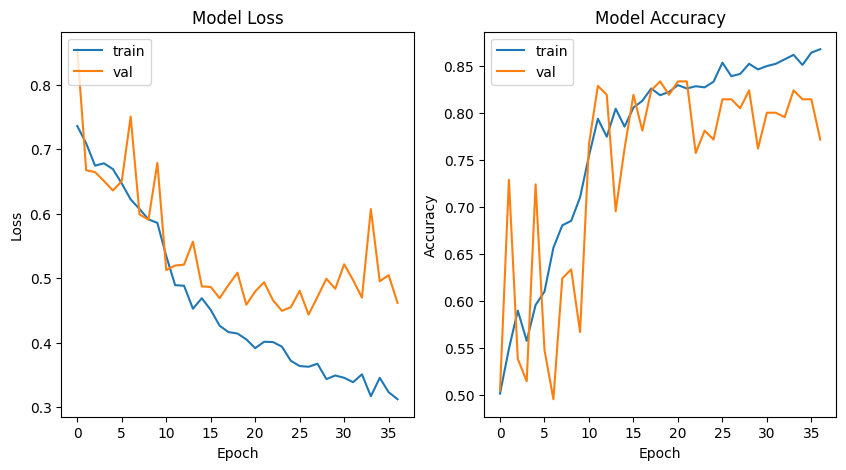

9/9 [==============================] - 4s 179ms/step
[[102  25]
 [ 21 114]]
Specificity:  0.8031496062992126
Sensitivity:  0.8444444444444444
Accuracy:  0.8244274809160306
Precision:  [0.82926829 0.82014388]
Recall:     [0.80314961 0.84444444]
F1score:    [0.816      0.83211679]
Iteracion:  2
Epoch 1/300
105/105 [==============================] - 24s 177ms/step - loss: 0.7156 - accuracy: 0.5107 - val_loss: 0.6866 - val_accuracy: 0.5000
Epoch 2/300
105/105 [==============================] - 18s 174ms/step - loss: 0.7122 - accuracy: 0.5215 - val_loss: 0.6719 - val_accuracy: 0.5000
Epoch 3/300
105/105 [==============================] - 18s 173ms/step - loss: 0.7111 - accuracy: 0.5394 - val_loss: 0.7486 - val_accuracy: 0.5000
Epoch 4/300
105/105 [==============================] - 18s 173ms/step - loss: 0.6767 - accuracy: 0.5883 - val_loss: 0.6667 - val_accuracy: 0.5190
Epoch 5/300
105/105 [==============================] - 18s 173ms/step - loss: 0.6813 - accuracy: 0.5537 - val_loss: 0.6528

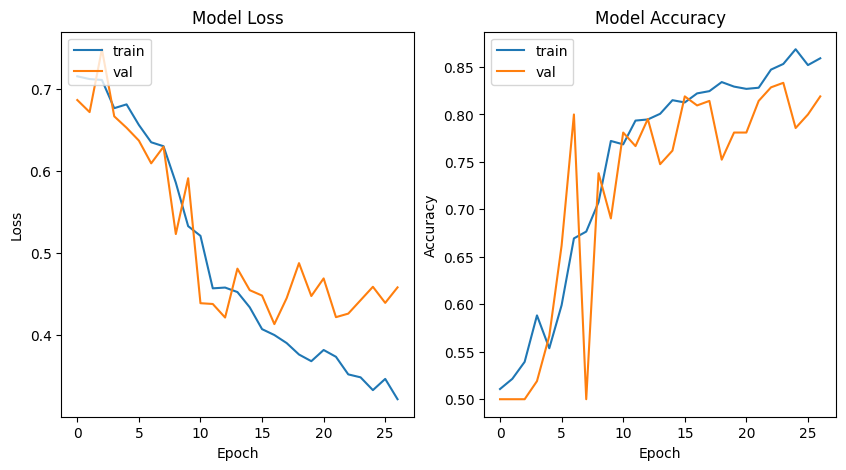

9/9 [==============================] - 2s 203ms/step
[[108  21]
 [ 30 103]]
Specificity:  0.8372093023255814
Sensitivity:  0.7744360902255639
Accuracy:  0.8053435114503816
Precision:  [0.7826087  0.83064516]
Recall:     [0.8372093  0.77443609]
F1score:    [0.80898876 0.80155642]
Iteracion:  3
Epoch 1/300
105/105 [==============================] - 24s 176ms/step - loss: 0.7088 - accuracy: 0.4881 - val_loss: 0.6858 - val_accuracy: 0.5381
Epoch 2/300
105/105 [==============================] - 18s 172ms/step - loss: 0.6960 - accuracy: 0.5442 - val_loss: 0.6855 - val_accuracy: 0.5286
Epoch 3/300
105/105 [==============================] - 18s 173ms/step - loss: 0.6913 - accuracy: 0.5346 - val_loss: 0.8957 - val_accuracy: 0.4619
Epoch 4/300
105/105 [==============================] - 18s 171ms/step - loss: 0.6888 - accuracy: 0.5430 - val_loss: 0.7025 - val_accuracy: 0.4619
Epoch 5/300
105/105 [==============================] - 18s 169ms/step - loss: 0.6807 - accuracy: 0.5704 - val_loss: 0.7000

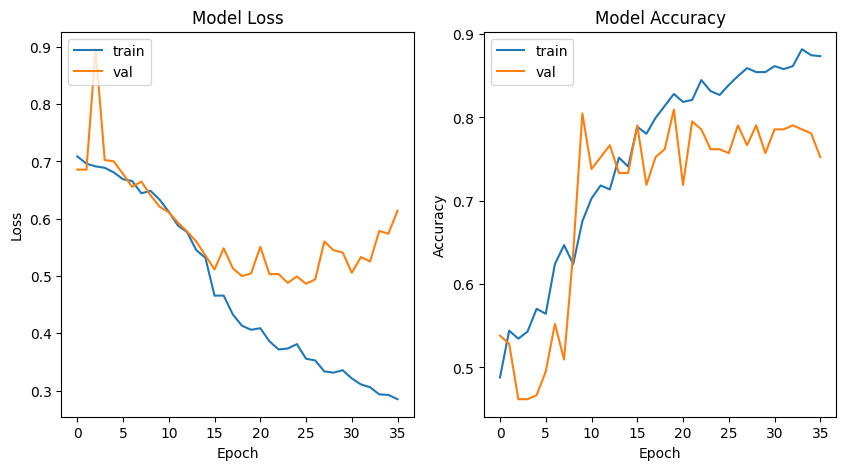

9/9 [==============================] - 2s 202ms/step
[[105  16]
 [ 41 100]]
Specificity:  0.8677685950413223
Sensitivity:  0.7092198581560284
Accuracy:  0.7824427480916031
Precision:  [0.71917808 0.86206897]
Recall:     [0.8677686  0.70921986]
F1score:    [0.78651685 0.77821012]
Iteracion:  4
Epoch 1/300
105/105 [==============================] - 24s 177ms/step - loss: 0.7181 - accuracy: 0.5215 - val_loss: 0.6936 - val_accuracy: 0.5333
Epoch 2/300
105/105 [==============================] - 18s 171ms/step - loss: 0.7050 - accuracy: 0.4988 - val_loss: 0.6833 - val_accuracy: 0.4667
Epoch 3/300
105/105 [==============================] - 18s 171ms/step - loss: 0.6917 - accuracy: 0.5477 - val_loss: 0.7663 - val_accuracy: 0.4667
Epoch 4/300
105/105 [==============================] - 18s 170ms/step - loss: 0.6999 - accuracy: 0.5203 - val_loss: 0.7194 - val_accuracy: 0.4667
Epoch 5/300
105/105 [==============================] - 18s 171ms/step - loss: 0.6752 - accuracy: 0.5668 - val_loss: 0.6787

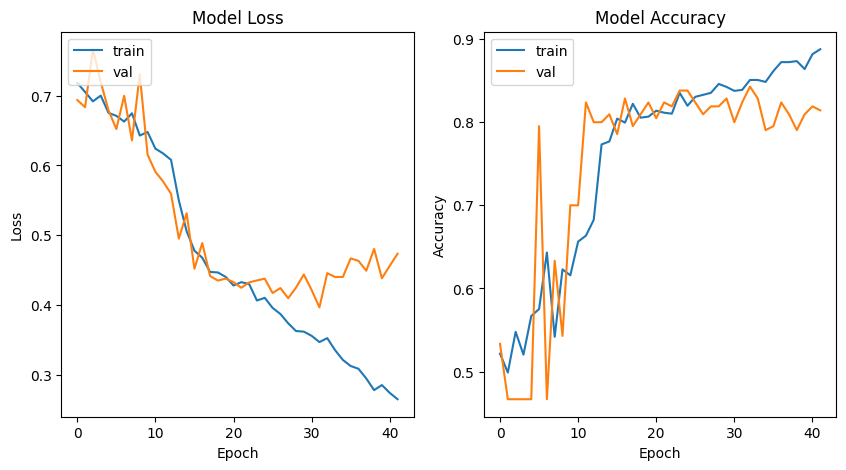

9/9 [==============================] - 2s 204ms/step
[[106  27]
 [ 19 110]]
Specificity:  0.7969924812030075
Sensitivity:  0.8527131782945736
Accuracy:  0.8244274809160306
Precision:  [0.848      0.80291971]
Recall:     [0.79699248 0.85271318]
F1score:    [0.82170543 0.82706767]
Iteracion:  5
Epoch 1/300
105/105 [==============================] - 24s 175ms/step - loss: 0.7519 - accuracy: 0.4928 - val_loss: 0.6902 - val_accuracy: 0.4524
Epoch 2/300
105/105 [==============================] - 18s 172ms/step - loss: 0.7035 - accuracy: 0.5131 - val_loss: 0.6708 - val_accuracy: 0.5667
Epoch 3/300
105/105 [==============================] - 18s 171ms/step - loss: 0.7159 - accuracy: 0.5084 - val_loss: 0.6666 - val_accuracy: 0.5857
Epoch 4/300
105/105 [==============================] - 18s 170ms/step - loss: 0.6863 - accuracy: 0.5585 - val_loss: 0.7917 - val_accuracy: 0.4524
Epoch 5/300
105/105 [==============================] - 18s 171ms/step - loss: 0.6757 - accuracy: 0.5680 - val_loss: 0.6492

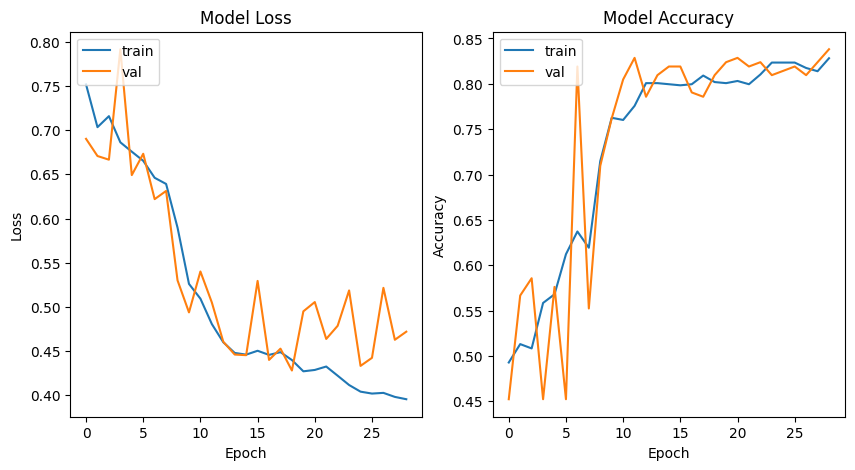

9/9 [==============================] - 2s 203ms/step
[[116  17]
 [ 29 100]]
Specificity:  0.8721804511278195
Sensitivity:  0.7751937984496124
Accuracy:  0.8244274809160306
Precision:  [0.8        0.85470085]
Recall:     [0.87218045 0.7751938 ]
F1score:    [0.83453237 0.81300813]
Media
Specificity:  0.8354600871993887  |  Sensitivity:  0.7912014739140445
Accuracy:  0.8122137404580153  |  Precision:  0.8149533644956584  |  Recall:  0.8133307805567167  |  F1score:  0.8119702542975219

Desviacion
Specificity:  0.03136561316684199  |  Sensitivity:  0.05268170986782829
Accuracy:  0.01661949699013531  |  Precision:  0.039946725039365034  |  Recall:  0.04867533599730375  |  F1score:  0.017776145063939406


In [19]:
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Activation, Dropout, BatchNormalization, Conv1DTranspose, concatenate, Input

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)
  x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)


  image_in=Input((x_train.shape[1], 1))

  #contracting path
  conv1=Conv1D(8,3,activation='relu',padding='same')(image_in)
  conv1=Conv1D(8,3,activation='relu',padding='same')(conv1)
  maxp1=MaxPooling1D(1)(conv1)

  conv2=Conv1D(16,3,activation='relu',padding='same')(maxp1)
  conv2=Conv1D(16,3,activation='relu',padding='same')(conv2)
  maxp2=MaxPooling1D(1)(conv2)

  conv3=Conv1D(32,3,activation='relu',padding='same')(maxp2)
  conv3=Conv1D(32,3,activation='relu',padding='same')(conv3)
  maxp3=MaxPooling1D(1)(conv3)

  conv4=Conv1D(64,3,activation='relu',padding='same')(maxp3)
  conv4=Conv1D(64,3,activation='relu',padding='same')(conv4)
  maxp4=MaxPooling1D(pool_size=1)(conv4)

  conv5=Conv1D(128,3,activation='relu',padding='same')(maxp4)
  conv5=Conv1D(128,3,activation='relu',padding='same')(conv5)

  #expansive path
  up6=Conv1DTranspose(64,2,strides=1,padding='same')(conv5)
  up6=concatenate([up6,conv4])
  conv6=Conv1D(64,3,activation='relu',padding='same')(up6)
  conv6=Conv1D(64,3,activation='relu',padding='same')(conv6)

  up7=Conv1DTranspose(32,2,strides=1,padding='same')(conv6)
  up7=concatenate([up7,conv3])
  conv7=Conv1D(32,3,activation='relu',padding='same')(up7)
  conv7=Conv1D(32,3,activation='relu',padding='same')(conv7)

  up8=Conv1DTranspose(16,2,strides=1,padding='same')(conv7)
  up8=concatenate([up8,conv2])
  conv8=Conv1D(16,3,activation='relu',padding='same')(up8)
  conv8=Conv1D(16,3,activation='relu',padding='same')(conv8)

  up9=Conv1DTranspose(8,2,strides=1,padding='same')(conv8)
  up9=concatenate([up9,conv1],axis=1)
  conv9=Conv1D(8,3,activation='relu',padding='same')(up9)
  conv9=Conv1D(8,3,activation='relu',padding='same')(conv9)

  conv10 = Flatten()(conv9)
  outputs = Dense(2, activation='softmax')(conv10)

  model=Model(inputs=[image_in],outputs=[outputs])

  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])
  #model.summary()


  #Entrenar
  callbackMed=tf.keras.callbacks.EarlyStopping(
      monitor='val_loss',
      min_delta=0,
      patience=10,
      verbose=0,
      mode='auto',
      baseline=None,
      restore_best_weights=True
  )

  history = model.fit(x_train, to_categorical(y_train, 2), epochs=300,  batch_size=8, verbose=1,
                      validation_data=(x_val, to_categorical(y_val, 2)), callbacks=[callbackMed,TensorBoard(log_dir='./cnntmp/log')])

  #Grafica Rendimiento ========================================
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

  ax1.plot(history.history['loss'])
  ax1.plot(history.history['val_loss'])
  ax1.set_title('Model Loss')
  ax1.set_ylabel('Loss')
  ax1.set_xlabel('Epoch')
  ax1.legend(['train', 'val'], loc='upper left')

  ax2.plot(history.history['accuracy'])
  ax2.plot(history.history['val_accuracy'])
  ax2.set_title('Model Accuracy')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epoch')
  ax2.legend(['train', 'val'], loc='upper left')
  plt.show()
  #===========================================================

  model.evaluate(x_test)
  pred = model.predict(x_test)

  pred_label=[np.argmax(pred[i]) for i in range(pred.shape[0])]

  mat=confusion_matrix(y_test, pred_label)

  tn, fp, fn, tp = mat.ravel()

  specificity = tn / (tn + fp)

  sensitivity = tp / (tp + fn)

  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))

  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec)," | ","Sensitivity: ",np.mean(sensVec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec)," | ","Sensitivity: ",np.std(sensVec))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

**RandomForest**

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  #split_data1, split_data = features_data[:data1.shape[0]], features_data[data1.shape[0]:]
  #x_train, x_test, y_train, y_test = train_test_split(split_data1, data1['DIAGN'], test_size=0.5)
  #x_train = pd.concat([x_train, split_data])
  #y_train = pd.concat([y_train, data2['DIAGN'],data3['DIAGN']])

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)

  rf = RandomForestClassifier(
      bootstrap= False,
      max_depth= 5,
      max_features= 'sqrt',
      min_samples_leaf= 2,
      min_samples_split= 10,
      n_estimators= 100)
  """
  parameter_space = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
  }

  rf = GridSearchCV(rf, parameter_space, n_jobs=-1, cv=3, refit=True)
  """
  rf.fit(x_train, y_train)

  #print("Mejores parametros:")
  #print(rf.best_params_)

  pred = rf.predict(x_test)

  pred_label=pred

  mat=confusion_matrix(y_test, pred_label)

  tn, fp, fn, tp = mat.ravel()

  specificity = tn / (tn + fp)

  sensitivity = tp / (tp + fn)

  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))

  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec)," | ","Sensitivity: ",np.mean(sensVec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec)," | ","Sensitivity: ",np.std(sensVec))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

Iteracion:  1
[[ 87  29]
 [ 17 129]]
Specificity:  0.75
Sensitivity:  0.8835616438356164
Accuracy:  0.8244274809160306
Precision:  [0.83653846 0.8164557 ]
Recall:     [0.75       0.88356164]
F1score:    [0.79090909 0.84868421]
Iteracion:  2
[[ 93  25]
 [ 15 129]]
Specificity:  0.788135593220339
Sensitivity:  0.8958333333333334
Accuracy:  0.8473282442748091
Precision:  [0.86111111 0.83766234]
Recall:     [0.78813559 0.89583333]
F1score:    [0.82300885 0.86577181]
Iteracion:  3
[[111  23]
 [ 12 116]]
Specificity:  0.8283582089552238
Sensitivity:  0.90625
Accuracy:  0.8664122137404581
Precision:  [0.90243902 0.83453237]
Recall:     [0.82835821 0.90625   ]
F1score:    [0.86381323 0.86891386]
Iteracion:  4
[[103  30]
 [ 14 115]]
Specificity:  0.7744360902255639
Sensitivity:  0.8914728682170543
Accuracy:  0.8320610687022901
Precision:  [0.88034188 0.79310345]
Recall:     [0.77443609 0.89147287]
F1score:    [0.824      0.83941606]
Iteracion:  5
[[107  31]
 [ 16 108]]
Specificity:  0.775362318

**LogisticRegression**

In [21]:
from sklearn.linear_model import LogisticRegression

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)

  clf = LogisticRegression(
      C= 1,
      class_weight= 'balanced',
      max_iter= 100,
      penalty= 'l2',
      solver= 'saga')
  """
  parameter_space = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000],
    'class_weight': [None, 'balanced']
  }

  clf = GridSearchCV(clf, parameter_space, n_jobs=-1, cv=3, refit=True)
  """
  clf.fit(x_train, y_train)

  #print("Mejores parametros:")
  #print(clf.best_params_)

  pred = clf.predict(x_test)

  pred_label=pred

  mat=confusion_matrix(y_test, pred_label)

  tn, fp, fn, tp = mat.ravel()

  specificity = tn / (tn + fp)

  sensitivity = tp / (tp + fn)

  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))

  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec)," | ","Sensitivity: ",np.mean(sensVec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec)," | ","Sensitivity: ",np.std(sensVec))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

Iteracion:  1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[104  21]
 [ 32 105]]
Specificity:  0.832
Sensitivity:  0.7664233576642335
Accuracy:  0.7977099236641222
Precision:  [0.76470588 0.83333333]
Recall:     [0.832      0.76642336]
F1score:    [0.79693487 0.79847909]
Iteracion:  2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[109  26]
 [ 27 100]]
Specificity:  0.8074074074074075
Sensitivity:  0.7874015748031497
Accuracy:  0.7977099236641222
Precision:  [0.80147059 0.79365079]
Recall:     [0.80740741 0.78740157]
F1score:    [0.80442804 0.79051383]
Iteracion:  3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[104  17]
 [ 40 101]]
Specificity:  0.859504132231405
Sensitivity:  0.7163120567375887
Accuracy:  0.7824427480916031
Precision:  [0.72222222 0.8559322 ]
Recall:     [0.85950413 0.71631206]
F1score:    [0.78490566 0.77992278]
Iteracion:  4


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[ 95  24]
 [ 31 112]]
Specificity:  0.7983193277310925
Sensitivity:  0.7832167832167832
Accuracy:  0.7900763358778626
Precision:  [0.75396825 0.82352941]
Recall:     [0.79831933 0.78321678]
F1score:    [0.7755102  0.80286738]
Iteracion:  5
[[ 97  24]
 [ 26 115]]
Specificity:  0.8016528925619835
Sensitivity:  0.8156028368794326
Accuracy:  0.8091603053435115
Precision:  [0.78861789 0.82733813]
Recall:     [0.80165289 0.81560284]
F1score:    [0.79508197 0.82142857]
Media
Specificity:  0.8197767519863776  |  Sensitivity:  0.7737913218602376
Accuracy:  0.7954198473282444  |  Precision:  0.7964768704592641  |  Recall:  0.7967840369233076  |  F1score:  0.7950072398161394

Desviacion
Specificity:  0.02310657289411526  |  Sensitivity:  0.032803761706814996
Accuracy:  0.008902216633351601  |  Precision:  0.03873294628249251  |  Recall:  0.036519381052884936  |  F1score:  0.01262657185516266


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**XGBoost**

In [22]:
import xgboost as xgb

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)

  params = {
    'objective': 'binary:logistic',  # función objetivo para la clasificación binaria
    'max_depth': 3,  # profundidad máxima del árbol
    'eta': 0.1,  # tasa de aprendizaje
    'gamma': 0.1,  # valor mínimo de pérdida necesaria para dividir un nodo
    'subsample': 0.8,  # fracción de observaciones a utilizar para cada árbol
    'colsample_bytree': 0.8  # fracción de características a utilizar para cada árbol
  }

  dtrain = xgb.DMatrix(x_train, label=y_train)
  dtest = xgb.DMatrix(x_test, label=y_test)

  num_rounds = 50  # número de rondas de entrenamiento
  model = xgb.train(params, dtrain, num_rounds)

  preds = model.predict(dtest)
  pred_label = [int(round(p)) for p in preds]

  mat=confusion_matrix(y_test, pred_label)

  tn, fp, fn, tp = mat.ravel()

  specificity = tn / (tn + fp)

  sensitivity = tp / (tp + fn)

  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))

  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec)," | ","Sensitivity: ",np.mean(sensVec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec)," | ","Sensitivity: ",np.std(sensVec))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

Iteracion:  1
[[101  24]
 [ 24 113]]
Specificity:  0.808
Sensitivity:  0.8248175182481752
Accuracy:  0.816793893129771
Precision:  [0.808      0.82481752]
Recall:     [0.808      0.82481752]
F1score:    [0.808      0.82481752]
Iteracion:  2
[[105  33]
 [ 18 106]]
Specificity:  0.7608695652173914
Sensitivity:  0.8548387096774194
Accuracy:  0.8053435114503816
Precision:  [0.85365854 0.76258993]
Recall:     [0.76086957 0.85483871]
F1score:    [0.8045977  0.80608365]
Iteracion:  3
[[101  31]
 [ 18 112]]
Specificity:  0.7651515151515151
Sensitivity:  0.8615384615384616
Accuracy:  0.8129770992366412
Precision:  [0.8487395  0.78321678]
Recall:     [0.76515152 0.86153846]
F1score:    [0.80478088 0.82051282]
Iteracion:  4
[[100  38]
 [ 20 104]]
Specificity:  0.7246376811594203
Sensitivity:  0.8387096774193549
Accuracy:  0.7786259541984732
Precision:  [0.83333333 0.73239437]
Recall:     [0.72463768 0.83870968]
F1score:    [0.7751938  0.78195489]
Iteracion:  5
[[104  28]
 [ 17 113]]
Specificity: 

**SVC**

In [33]:
#SVC
from sklearn.svm import SVC

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)

  SVM = SVC(
      C= 1,
      class_weight= None,
      degree= 2,
      gamma= 'scale',
      kernel= 'rbf')
  """
  parameter_space = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.1, 1],
    'class_weight': [None, 'balanced']
  }

  SVM = GridSearchCV(SVM, parameter_space, n_jobs=-1, cv=3, refit=True)
  """
  SVM.fit(x_train, y_train)

  #print("Mejores parametros:")
  #print(SVM.best_params_)

  pred = SVM.predict(x_test)
  pred_label=pred

  mat=confusion_matrix(y_test, pred_label)

  tn, fp, fn, tp = mat.ravel()

  specificity = tn / (tn + fp)

  sensitivity = tp / (tp + fn)

  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))

  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec)," | ","Sensitivity: ",np.mean(sensVec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec)," | ","Sensitivity: ",np.std(sensVec))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

Iteracion:  1
[[105  33]
 [ 14 110]]
Specificity:  0.7608695652173914
Sensitivity:  0.8870967741935484
Accuracy:  0.8206106870229007
Precision:  [0.88235294 0.76923077]
Recall:     [0.76086957 0.88709677]
F1score:    [0.81712062 0.82397004]
Iteracion:  2
[[105  22]
 [  8 127]]
Specificity:  0.8267716535433071
Sensitivity:  0.9407407407407408
Accuracy:  0.8854961832061069
Precision:  [0.92920354 0.85234899]
Recall:     [0.82677165 0.94074074]
F1score:    [0.875     0.8943662]
Iteracion:  3
[[102  36]
 [ 14 110]]
Specificity:  0.7391304347826086
Sensitivity:  0.8870967741935484
Accuracy:  0.8091603053435115
Precision:  [0.87931034 0.75342466]
Recall:     [0.73913043 0.88709677]
F1score:    [0.80314961 0.81481481]
Iteracion:  4
[[108  26]
 [ 16 112]]
Specificity:  0.8059701492537313
Sensitivity:  0.875
Accuracy:  0.8396946564885496
Precision:  [0.87096774 0.8115942 ]
Recall:     [0.80597015 0.875     ]
F1score:    [0.8372093  0.84210526]
Iteracion:  5
[[106  25]
 [ 14 117]]
Specificity:  

# **PCA**

In [24]:
# Aplanar las características extraídas
features_data = feature_extractor.flatten().reshape(feature_extractor.shape[0], -1)
print(features_data.shape)

(1310, 25088)


**PCA**

In [25]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(features_data)
modelo_pca = pca_pipe.named_steps['pca']

In [26]:
cnt=1
sum=0
for i in modelo_pca.explained_variance_ratio_ :
  if(cnt<200):
    sum+=i
  cnt+=1
print(sum*100)

97.94740790093783


In [27]:
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=200))
pca_pipe.fit(features_data)
modelo_pca = pca_pipe.named_steps['pca']
features_data = pca_pipe.transform(features_data)
features_data.shape

(1310, 200)

**UNET 1D**

Iteracion:  1
Epoch 1/300
27/27 [==============================] - 10s 88ms/step - loss: 0.6872 - accuracy: 0.4773 - val_loss: 0.6441 - val_accuracy: 0.5381
Epoch 2/300
27/27 [==============================] - 0s 13ms/step - loss: 0.6568 - accuracy: 0.4940 - val_loss: 0.6213 - val_accuracy: 0.5571
Epoch 3/300
27/27 [==============================] - 0s 13ms/step - loss: 0.6374 - accuracy: 0.5728 - val_loss: 0.5938 - val_accuracy: 0.6667
Epoch 4/300
27/27 [==============================] - 0s 13ms/step - loss: 0.6172 - accuracy: 0.6838 - val_loss: 0.5840 - val_accuracy: 0.7714
Epoch 5/300
27/27 [==============================] - 0s 13ms/step - loss: 0.5953 - accuracy: 0.7745 - val_loss: 0.5632 - val_accuracy: 0.8286
Epoch 6/300
27/27 [==============================] - 0s 13ms/step - loss: 0.5660 - accuracy: 0.8126 - val_loss: 0.5058 - val_accuracy: 0.8190
Epoch 7/300
27/27 [==============================] - 0s 13ms/step - loss: 0.5402 - accuracy: 0.8091 - val_loss: 0.4871 - val_accuracy

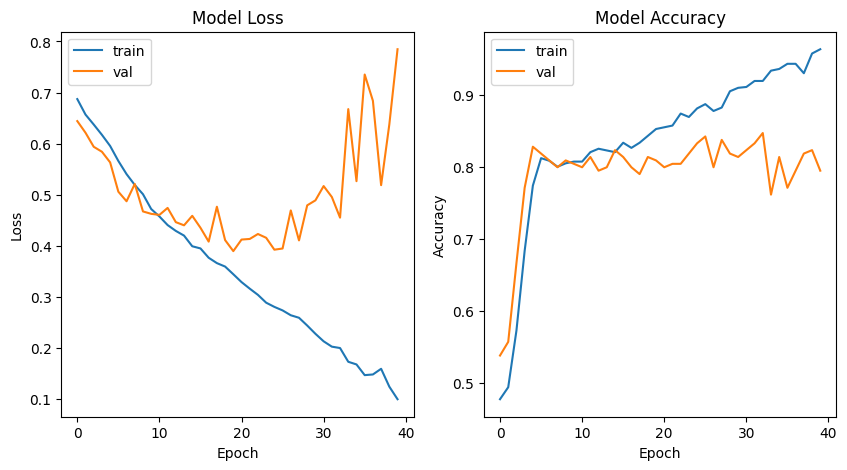

9/9 [==============================] - 0s 3ms/step
[[ 98  27]
 [ 18 119]]
Specificity:  0.784
Sensitivity:  0.8686131386861314
Accuracy:  0.8282442748091603
Precision:  [0.84482759 0.81506849]
Recall:     [0.784      0.86861314]
F1score:    [0.81327801 0.8409894 ]
Iteracion:  2
Epoch 1/300
27/27 [==============================] - 7s 33ms/step - loss: 0.6582 - accuracy: 0.5095 - val_loss: 0.6750 - val_accuracy: 0.4667
Epoch 2/300
27/27 [==============================] - 0s 14ms/step - loss: 0.6376 - accuracy: 0.5131 - val_loss: 0.6676 - val_accuracy: 0.4667
Epoch 3/300
27/27 [==============================] - 0s 13ms/step - loss: 0.6235 - accuracy: 0.5167 - val_loss: 0.6559 - val_accuracy: 0.5095
Epoch 4/300
27/27 [==============================] - 0s 13ms/step - loss: 0.6070 - accuracy: 0.5788 - val_loss: 0.6487 - val_accuracy: 0.5952
Epoch 5/300
27/27 [==============================] - 0s 13ms/step - loss: 0.5888 - accuracy: 0.6778 - val_loss: 0.6230 - val_accuracy: 0.7571
Epoch 6/300

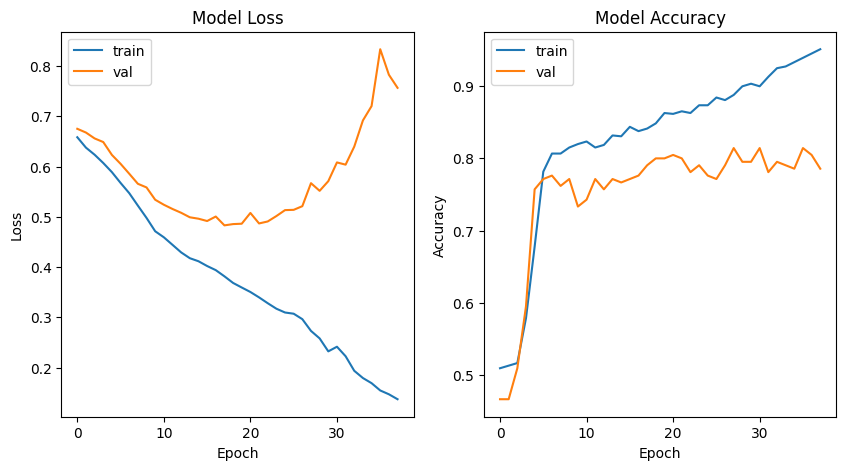

9/9 [==============================] - 0s 4ms/step
[[110  25]
 [ 32  95]]
Specificity:  0.8148148148148148
Sensitivity:  0.7480314960629921
Accuracy:  0.7824427480916031
Precision:  [0.77464789 0.79166667]
Recall:     [0.81481481 0.7480315 ]
F1score:    [0.79422383 0.76923077]
Iteracion:  3
Epoch 1/300
27/27 [==============================] - 7s 34ms/step - loss: 0.6682 - accuracy: 0.4964 - val_loss: 0.6817 - val_accuracy: 0.4667
Epoch 2/300
27/27 [==============================] - 0s 14ms/step - loss: 0.6516 - accuracy: 0.5012 - val_loss: 0.6741 - val_accuracy: 0.4667
Epoch 3/300
27/27 [==============================] - 0s 13ms/step - loss: 0.6403 - accuracy: 0.5012 - val_loss: 0.6630 - val_accuracy: 0.4667
Epoch 4/300
27/27 [==============================] - 0s 14ms/step - loss: 0.6285 - accuracy: 0.5095 - val_loss: 0.6504 - val_accuracy: 0.5048
Epoch 5/300
27/27 [==============================] - 0s 14ms/step - loss: 0.6126 - accuracy: 0.6384 - val_loss: 0.6293 - val_accuracy: 0.657

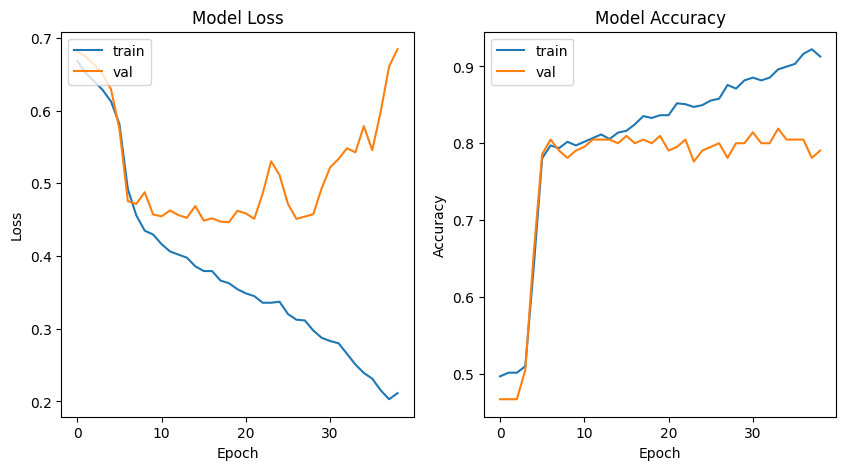

9/9 [==============================] - 0s 4ms/step
[[ 95  30]
 [ 19 118]]
Specificity:  0.76
Sensitivity:  0.8613138686131386
Accuracy:  0.8129770992366412
Precision:  [0.83333333 0.7972973 ]
Recall:     [0.76       0.86131387]
F1score:    [0.79497908 0.82807018]
Iteracion:  4
Epoch 1/300
27/27 [==============================] - 6s 33ms/step - loss: 0.6654 - accuracy: 0.4988 - val_loss: 0.6620 - val_accuracy: 0.4905
Epoch 2/300
27/27 [==============================] - 0s 13ms/step - loss: 0.6384 - accuracy: 0.5501 - val_loss: 0.6404 - val_accuracy: 0.6048
Epoch 3/300
27/27 [==============================] - 0s 13ms/step - loss: 0.6021 - accuracy: 0.7160 - val_loss: 0.5942 - val_accuracy: 0.7524
Epoch 4/300
27/27 [==============================] - 0s 14ms/step - loss: 0.5254 - accuracy: 0.8138 - val_loss: 0.5980 - val_accuracy: 0.6810
Epoch 5/300
27/27 [==============================] - 0s 14ms/step - loss: 0.4991 - accuracy: 0.7733 - val_loss: 0.5284 - val_accuracy: 0.7667
Epoch 6/300


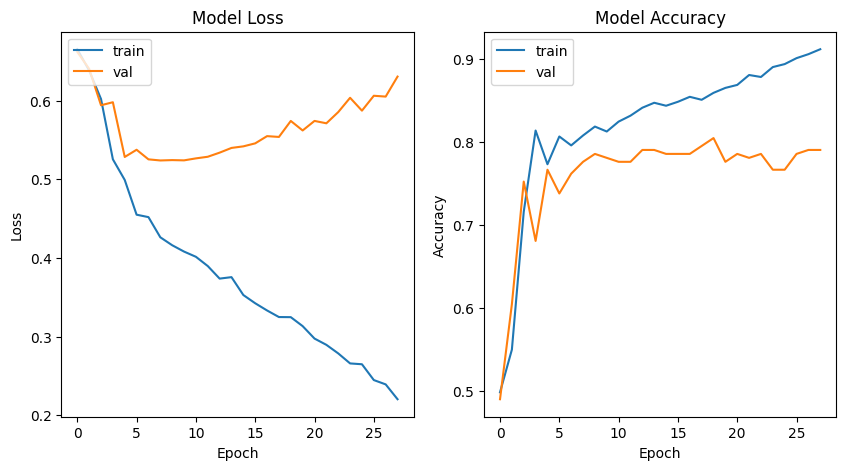

9/9 [==============================] - 0s 4ms/step
[[ 89  42]
 [ 17 114]]
Specificity:  0.6793893129770993
Sensitivity:  0.8702290076335878
Accuracy:  0.7748091603053435
Precision:  [0.83962264 0.73076923]
Recall:     [0.67938931 0.87022901]
F1score:    [0.75105485 0.79442509]
Iteracion:  5
Epoch 1/300
27/27 [==============================] - 6s 33ms/step - loss: 0.6755 - accuracy: 0.5215 - val_loss: 0.6653 - val_accuracy: 0.4810
Epoch 2/300
27/27 [==============================] - 0s 14ms/step - loss: 0.6517 - accuracy: 0.5084 - val_loss: 0.6544 - val_accuracy: 0.4810
Epoch 3/300
27/27 [==============================] - 0s 13ms/step - loss: 0.6374 - accuracy: 0.5095 - val_loss: 0.6421 - val_accuracy: 0.4905
Epoch 4/300
27/27 [==============================] - 0s 13ms/step - loss: 0.6170 - accuracy: 0.5740 - val_loss: 0.6195 - val_accuracy: 0.6190
Epoch 5/300
27/27 [==============================] - 0s 13ms/step - loss: 0.5933 - accuracy: 0.7363 - val_loss: 0.5953 - val_accuracy: 0.728

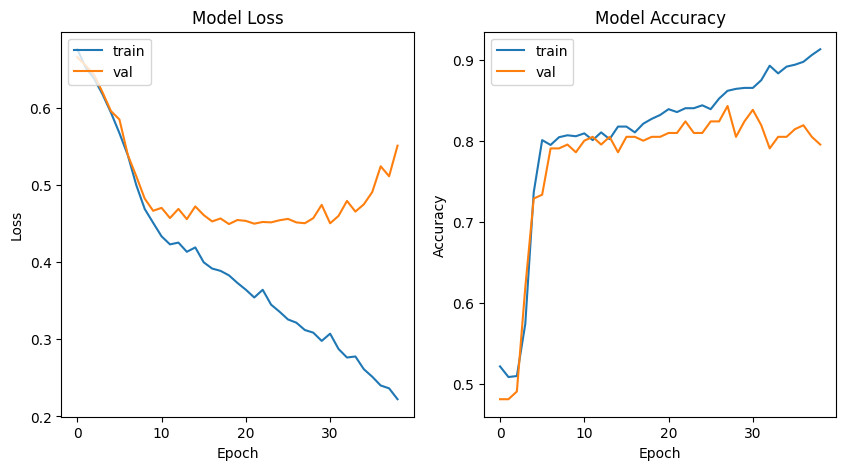

9/9 [==============================] - 0s 4ms/step
[[ 84  47]
 [ 14 117]]
Specificity:  0.6412213740458015
Sensitivity:  0.8931297709923665
Accuracy:  0.767175572519084
Precision:  [0.85714286 0.71341463]
Recall:     [0.64122137 0.89312977]
F1score:    [0.73362445 0.79322034]
Media
Specificity:  0.7358851003675431  |  Sensitivity:  0.8482634563976432
Accuracy:  0.7931297709923665  |  Precision:  0.7997790627546685  |  Recall:  0.7920742783825931  |  F1score:  0.7913095991034329

Desviacion
Specificity:  0.06523720847436154  |  Sensitivity:  0.05123736981379004
Accuracy:  0.023453880146163678  |  Precision:  0.04603461571885822  |  Recall:  0.0812268702061589  |  F1score:  0.031261548008481105


In [28]:
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Activation, Dropout, BatchNormalization, Conv1DTranspose, concatenate, Input

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)
  x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)


  image_in=Input((x_train.shape[1], 1))

  #contracting path
  conv1=Conv1D(8,3,activation='relu',padding='same')(image_in)
  conv1=Conv1D(8,3,activation='relu',padding='same')(conv1)
  maxp1=MaxPooling1D(1)(conv1)

  conv2=Conv1D(16,3,activation='relu',padding='same')(maxp1)
  conv2=Conv1D(16,3,activation='relu',padding='same')(conv2)
  maxp2=MaxPooling1D(1)(conv2)

  conv3=Conv1D(32,3,activation='relu',padding='same')(maxp2)
  conv3=Conv1D(32,3,activation='relu',padding='same')(conv3)
  maxp3=MaxPooling1D(1)(conv3)

  conv4=Conv1D(64,3,activation='relu',padding='same')(maxp3)
  conv4=Conv1D(64,3,activation='relu',padding='same')(conv4)
  maxp4=MaxPooling1D(pool_size=1)(conv4)

  conv5=Conv1D(128,3,activation='relu',padding='same')(maxp4)
  conv5=Conv1D(128,3,activation='relu',padding='same')(conv5)

  #expansive path
  up6=Conv1DTranspose(64,2,strides=1,padding='same')(conv5)
  up6=concatenate([up6,conv4])
  conv6=Conv1D(64,3,activation='relu',padding='same')(up6)
  conv6=Conv1D(64,3,activation='relu',padding='same')(conv6)

  up7=Conv1DTranspose(32,2,strides=1,padding='same')(conv6)
  up7=concatenate([up7,conv3])
  conv7=Conv1D(32,3,activation='relu',padding='same')(up7)
  conv7=Conv1D(32,3,activation='relu',padding='same')(conv7)

  up8=Conv1DTranspose(16,2,strides=1,padding='same')(conv7)
  up8=concatenate([up8,conv2])
  conv8=Conv1D(16,3,activation='relu',padding='same')(up8)
  conv8=Conv1D(16,3,activation='relu',padding='same')(conv8)

  up9=Conv1DTranspose(8,2,strides=1,padding='same')(conv8)
  up9=concatenate([up9,conv1],axis=1)
  conv9=Conv1D(8,3,activation='relu',padding='same')(up9)
  conv9=Conv1D(8,3,activation='relu',padding='same')(conv9)

  conv10 = Flatten()(conv9)
  outputs = Dense(2, activation='softmax')(conv10)

  model=Model(inputs=[image_in],outputs=[outputs])

  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])
  #model.summary()


  #Entrenar
  callbackMed=tf.keras.callbacks.EarlyStopping(
      monitor='val_loss',
      min_delta=0,
      patience=20,
      verbose=0,
      mode='auto',
      baseline=None,
      restore_best_weights=True
  )

  history = model.fit(x_train, to_categorical(y_train, 2), epochs=300,  batch_size=32, verbose=1,
                      validation_data=(x_val, to_categorical(y_val, 2)), callbacks=[callbackMed,TensorBoard(log_dir='./cnntmp/log')])

  #Grafica Rendimiento ========================================
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

  ax1.plot(history.history['loss'])
  ax1.plot(history.history['val_loss'])
  ax1.set_title('Model Loss')
  ax1.set_ylabel('Loss')
  ax1.set_xlabel('Epoch')
  ax1.legend(['train', 'val'], loc='upper left')

  ax2.plot(history.history['accuracy'])
  ax2.plot(history.history['val_accuracy'])
  ax2.set_title('Model Accuracy')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epoch')
  ax2.legend(['train', 'val'], loc='upper left')
  plt.show()
  #===========================================================

  pred = model.predict(x_test)

  pred_label=[np.argmax(pred[i]) for i in range(pred.shape[0])]

  mat=confusion_matrix(y_test, pred_label)

  tn, fp, fn, tp = mat.ravel()

  specificity = tn / (tn + fp)

  sensitivity = tp / (tp + fn)

  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))

  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec)," | ","Sensitivity: ",np.mean(sensVec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec)," | ","Sensitivity: ",np.std(sensVec))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

**RandomForest**

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)

  rf = RandomForestClassifier(
      bootstrap= False,
      max_depth= 5,
      max_features= 'sqrt',
      min_samples_leaf= 2,
      min_samples_split= 10,
      n_estimators= 100)
  """
  parameter_space = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
  }

  rf = GridSearchCV(rf, parameter_space, n_jobs=-1, cv=3, refit=True)
  """
  rf.fit(x_train, y_train)

  #print("Mejores parametros:")
  #print(rf.best_params_)

  pred = rf.predict(x_test)

  pred_label=pred

  mat=confusion_matrix(y_test, pred_label)

  tn, fp, fn, tp = mat.ravel()

  specificity = tn / (tn + fp)

  sensitivity = tp / (tp + fn)

  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))

  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec)," | ","Sensitivity: ",np.mean(sensVec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec)," | ","Sensitivity: ",np.std(sensVec))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

Iteracion:  1
[[ 97  38]
 [ 17 110]]
Specificity:  0.7185185185185186
Sensitivity:  0.8661417322834646
Accuracy:  0.7900763358778626
Precision:  [0.85087719 0.74324324]
Recall:     [0.71851852 0.86614173]
F1score:    [0.77911647 0.8       ]
Iteracion:  2
[[103  28]
 [ 20 111]]
Specificity:  0.7862595419847328
Sensitivity:  0.8473282442748091
Accuracy:  0.816793893129771
Precision:  [0.83739837 0.79856115]
Recall:     [0.78625954 0.84732824]
F1score:    [0.81102362 0.82222222]
Iteracion:  3
[[103  40]
 [ 14 105]]
Specificity:  0.7202797202797203
Sensitivity:  0.8823529411764706
Accuracy:  0.7938931297709924
Precision:  [0.88034188 0.72413793]
Recall:     [0.72027972 0.88235294]
F1score:    [0.79230769 0.79545455]
Iteracion:  4
[[ 99  38]
 [  8 117]]
Specificity:  0.7226277372262774
Sensitivity:  0.936
Accuracy:  0.8244274809160306
Precision:  [0.92523364 0.75483871]
Recall:     [0.72262774 0.936     ]
F1score:    [0.81147541 0.83571429]
Iteracion:  5
[[107  36]
 [ 14 105]]
Specificity: 

**LogisticRegression**

In [30]:
from sklearn.linear_model import LogisticRegression

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)

  clf = LogisticRegression(
      C= 1,
      class_weight= 'balanced',
      max_iter= 100,
      penalty= 'l2',
      solver= 'saga')
  """
  parameter_space = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000],
    'class_weight': [None, 'balanced']
  }

  clf = GridSearchCV(clf, parameter_space, n_jobs=-1, cv=3, refit=True)
  """
  clf.fit(x_train, y_train)

  #print("Mejores parametros:")
  #print(clf.best_params_)

  pred = clf.predict(x_test)

  pred_label=pred

  mat=confusion_matrix(y_test, pred_label)

  tn, fp, fn, tp = mat.ravel()

  specificity = tn / (tn + fp)

  sensitivity = tp / (tp + fn)

  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))

  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec)," | ","Sensitivity: ",np.mean(sensVec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec)," | ","Sensitivity: ",np.std(sensVec))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

Iteracion:  1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[112  22]
 [ 18 110]]
Specificity:  0.835820895522388
Sensitivity:  0.859375
Accuracy:  0.8473282442748091
Precision:  [0.86153846 0.83333333]
Recall:     [0.8358209 0.859375 ]
F1score:    [0.84848485 0.84615385]
Iteracion:  2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[112  18]
 [ 28 104]]
Specificity:  0.8615384615384616
Sensitivity:  0.7878787878787878
Accuracy:  0.8244274809160306
Precision:  [0.8        0.85245902]
Recall:     [0.86153846 0.78787879]
F1score:    [0.82962963 0.81889764]
Iteracion:  3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[ 97  23]
 [ 28 114]]
Specificity:  0.8083333333333333
Sensitivity:  0.8028169014084507
Accuracy:  0.8053435114503816
Precision:  [0.776      0.83211679]
Recall:     [0.80833333 0.8028169 ]
F1score:    [0.79183673 0.8172043 ]
Iteracion:  4


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[114  22]
 [ 25 101]]
Specificity:  0.8382352941176471
Sensitivity:  0.8015873015873016
Accuracy:  0.8206106870229007
Precision:  [0.82014388 0.82113821]
Recall:     [0.83823529 0.8015873 ]
F1score:    [0.82909091 0.81124498]
Iteracion:  5
[[110  18]
 [ 25 109]]
Specificity:  0.859375
Sensitivity:  0.8134328358208955
Accuracy:  0.8358778625954199
Precision:  [0.81481481 0.85826772]
Recall:     [0.859375   0.81343284]
F1score:    [0.8365019  0.83524904]
Media
Specificity:  0.840660596902366  |  Sensitivity:  0.8130181653390872
Accuracy:  0.8267175572519083  |  Precision:  0.8269812227210853  |  Recall:  0.8268393811207266  |  F1score:  0.8264293830129613

Desviacion
Specificity:  0.01928974280787847  |  Sensitivity:  0.024559506519364296
Accuracy:  0.014199294074609375  |  Precision:  0.025386751790351745  |  Recall:  0.026051060913464485  |  F1score:  0.016251498544153777


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**XGBoost**

In [31]:
import xgboost as xgb

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)

  params = {
    'objective': 'binary:logistic',  # función objetivo para la clasificación binaria
    'max_depth': 3,  # profundidad máxima del árbol
    'eta': 0.1,  # tasa de aprendizaje
    'gamma': 0.1,  # valor mínimo de pérdida necesaria para dividir un nodo
    'subsample': 0.8,  # fracción de observaciones a utilizar para cada árbol
    'colsample_bytree': 0.8  # fracción de características a utilizar para cada árbol
  }

  dtrain = xgb.DMatrix(x_train, label=y_train)
  dtest = xgb.DMatrix(x_test, label=y_test)

  num_rounds = 50  # número de rondas de entrenamiento
  model = xgb.train(params, dtrain, num_rounds)

  preds = model.predict(dtest)
  pred_label = [int(round(p)) for p in preds]

  mat=confusion_matrix(y_test, pred_label)

  tn, fp, fn, tp = mat.ravel()

  specificity = tn / (tn + fp)

  sensitivity = tp / (tp + fn)

  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))

  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec)," | ","Sensitivity: ",np.mean(sensVec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec)," | ","Sensitivity: ",np.std(sensVec))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

Iteracion:  1
[[109  29]
 [ 18 106]]
Specificity:  0.7898550724637681
Sensitivity:  0.8548387096774194
Accuracy:  0.8206106870229007
Precision:  [0.85826772 0.78518519]
Recall:     [0.78985507 0.85483871]
F1score:    [0.82264151 0.81853282]
Iteracion:  2
[[100  35]
 [ 19 108]]
Specificity:  0.7407407407407407
Sensitivity:  0.8503937007874016
Accuracy:  0.7938931297709924
Precision:  [0.84033613 0.75524476]
Recall:     [0.74074074 0.8503937 ]
F1score:    [0.78740157 0.8       ]
Iteracion:  3
[[115  27]
 [ 13 107]]
Specificity:  0.8098591549295775
Sensitivity:  0.8916666666666667
Accuracy:  0.8473282442748091
Precision:  [0.8984375  0.79850746]
Recall:     [0.80985915 0.89166667]
F1score:    [0.85185185 0.84251969]
Iteracion:  4
[[ 92  31]
 [ 23 116]]
Specificity:  0.7479674796747967
Sensitivity:  0.8345323741007195
Accuracy:  0.7938931297709924
Precision:  [0.8        0.78911565]
Recall:     [0.74796748 0.83453237]
F1score:    [0.77310924 0.81118881]
Iteracion:  5
[[ 98  27]
 [ 19 118]]

**SVC**

In [32]:
#SVC
from sklearn.svm import SVC

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)

  SVM = SVC(
      C= 1,
      class_weight= None,
      degree= 2,
      gamma= 'scale',
      kernel= 'rbf')
  """
  parameter_space = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.1, 1],
    'class_weight': [None, 'balanced']
  }

  SVM = GridSearchCV(SVM, parameter_space, n_jobs=-1, cv=3, refit=True)
  """
  SVM.fit(x_train, y_train)

  #print("Mejores parametros:")
  #print(SVM.best_params_)

  pred = SVM.predict(x_test)
  pred_label=pred

  mat=confusion_matrix(y_test, pred_label)

  tn, fp, fn, tp = mat.ravel()

  specificity = tn / (tn + fp)

  sensitivity = tp / (tp + fn)

  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))

  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec)," | ","Sensitivity: ",np.mean(sensVec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec)," | ","Sensitivity: ",np.std(sensVec))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

Iteracion:  1
[[111  23]
 [ 15 113]]
Specificity:  0.8283582089552238
Sensitivity:  0.8828125
Accuracy:  0.8549618320610687
Precision:  [0.88095238 0.83088235]
Recall:     [0.82835821 0.8828125 ]
F1score:    [0.85384615 0.85606061]
Iteracion:  2
[[ 97  23]
 [ 15 127]]
Specificity:  0.8083333333333333
Sensitivity:  0.8943661971830986
Accuracy:  0.8549618320610687
Precision:  [0.86607143 0.84666667]
Recall:     [0.80833333 0.8943662 ]
F1score:    [0.8362069  0.86986301]
Iteracion:  3
[[ 99  31]
 [ 17 115]]
Specificity:  0.7615384615384615
Sensitivity:  0.8712121212121212
Accuracy:  0.816793893129771
Precision:  [0.85344828 0.78767123]
Recall:     [0.76153846 0.87121212]
F1score:    [0.80487805 0.82733813]
Iteracion:  4
[[102  25]
 [ 26 109]]
Specificity:  0.8031496062992126
Sensitivity:  0.8074074074074075
Accuracy:  0.8053435114503816
Precision:  [0.796875   0.81343284]
Recall:     [0.80314961 0.80740741]
F1score:    [0.8        0.81040892]
Iteracion:  5
[[107  26]
 [ 15 114]]
Specifici